## Trabalho - Keras

## Aluno: Leonardo Henrique de Figueiredo

Utilizacao de Rede Neural Convolucional (CNN): Algoritmo de aprendizado de máquina para que as máquinas entendam os recursos da imagem com previsão e lembrar dos recursos para adivinhar o nome da nova imagem que sera alimentada à máquina.

Declaração do problema: Prever a entrada da imagem para verificacao de tipo de doenca em parreiras

Banco de dados utilizado: https://www.kaggle.com/code/andreamontemurro/gravepine-disease-classification/data

Passos para o trabalho:

A)criacao de conjunto de dados.
B)CNN
C) Construindo o modelo
D) Treinando o modelo
E) Fazer as previsões.


In [1]:
#importacao de bibliotecas 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

2022-12-07 21:17:38.258458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 21:17:38.782294: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/trabalhof/mlpytorch/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-07 21:17:38.782327: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-07 21:17:40.209965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7';

In [2]:
#caminho para as imagens
path="/home/trabalhof/Grape/"

BATCH_SIZE = 64
IMG_SIZE = (160, 160)
EPOCHS = 5
INIT_LR =1e-4

In [3]:
#categorias das doencas das parreiras
categories = ["Grape___Black_rot","Grape___Esca_(Black_Measles)","Grape___healthy","Grape___Leaf_blight_(Isariopsis_Leaf_Spot)"]

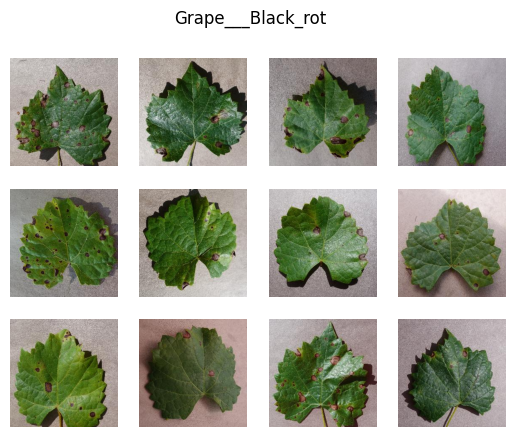

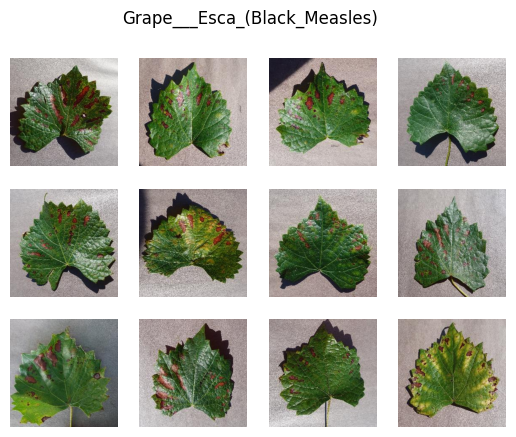

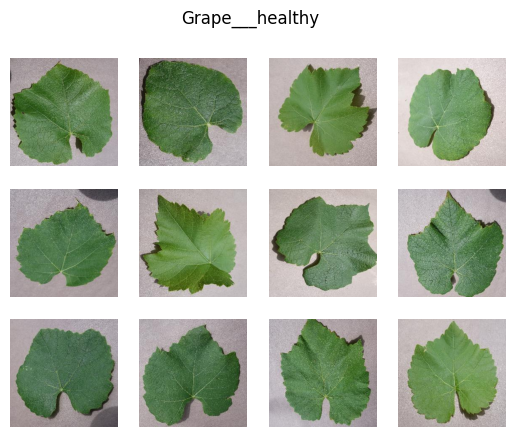

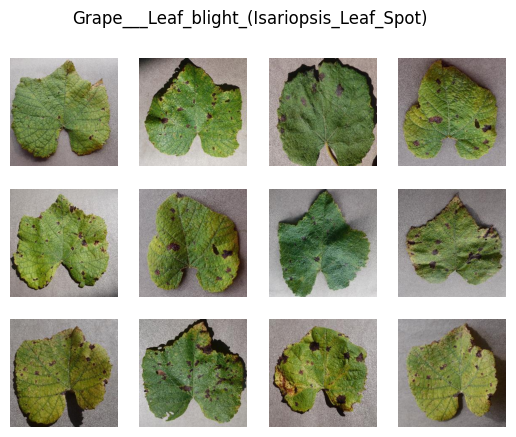

In [4]:
# Visualizacao de algumas imagens do banco de dados para cada doenca

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [5]:
#redefinindo o tamanho das imagens do banco de dados
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

Grape___Black_rot  => height min :  256 width min :  256
Grape___Black_rot  => height max :  256 width max :  256
Grape___Esca_(Black_Measles)  => height min :  256 width min :  256
Grape___Esca_(Black_Measles)  => height max :  256 width max :  256
Grape___healthy  => height min :  256 width min :  256
Grape___healthy  => height max :  256 width max :  256
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)  => height min :  256 width min :  256
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)  => height max :  256 width max :  256


In [6]:
# inicializa os dados e rótulos
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# peguando os caminhos da imagem e embaralhando aleatoriamente
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop das imagens de entrada, utilizacao do OpenCV
for imagePath in imagePaths:
# carreguamento de imagem, redimensionamento da imagem para ser HEIGHT * WIDTH pixels (ignorando proporção) e armazenando a imagem na lista de dados
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
# extraindo o rótulo da classe do caminho da imagem e atualizando a lista de lista de marcadores
    label = imagePath[1]
    labels.append(label)

[['/home/trabalhof/Grape/Grape___Black_rot/943.jpg', 0], ['/home/trabalhof/Grape/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/790.jpg', 3], ['/home/trabalhof/Grape/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/230.jpg', 3], ['/home/trabalhof/Grape/Grape___Black_rot/1163.jpg', 0], ['/home/trabalhof/Grape/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/289.jpg', 3], ['/home/trabalhof/Grape/Grape___Esca_(Black_Measles)/1356.jpg', 1], ['/home/trabalhof/Grape/Grape___Esca_(Black_Measles)/403.jpg', 1], ['/home/trabalhof/Grape/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/473.jpg', 3], ['/home/trabalhof/Grape/Grape___Esca_(Black_Measles)/884.jpg', 1], ['/home/trabalhof/Grape/Grape___healthy/62.jpg', 2]]


In [7]:
# dimensionando as intensidades dos pixels para o intervalo [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

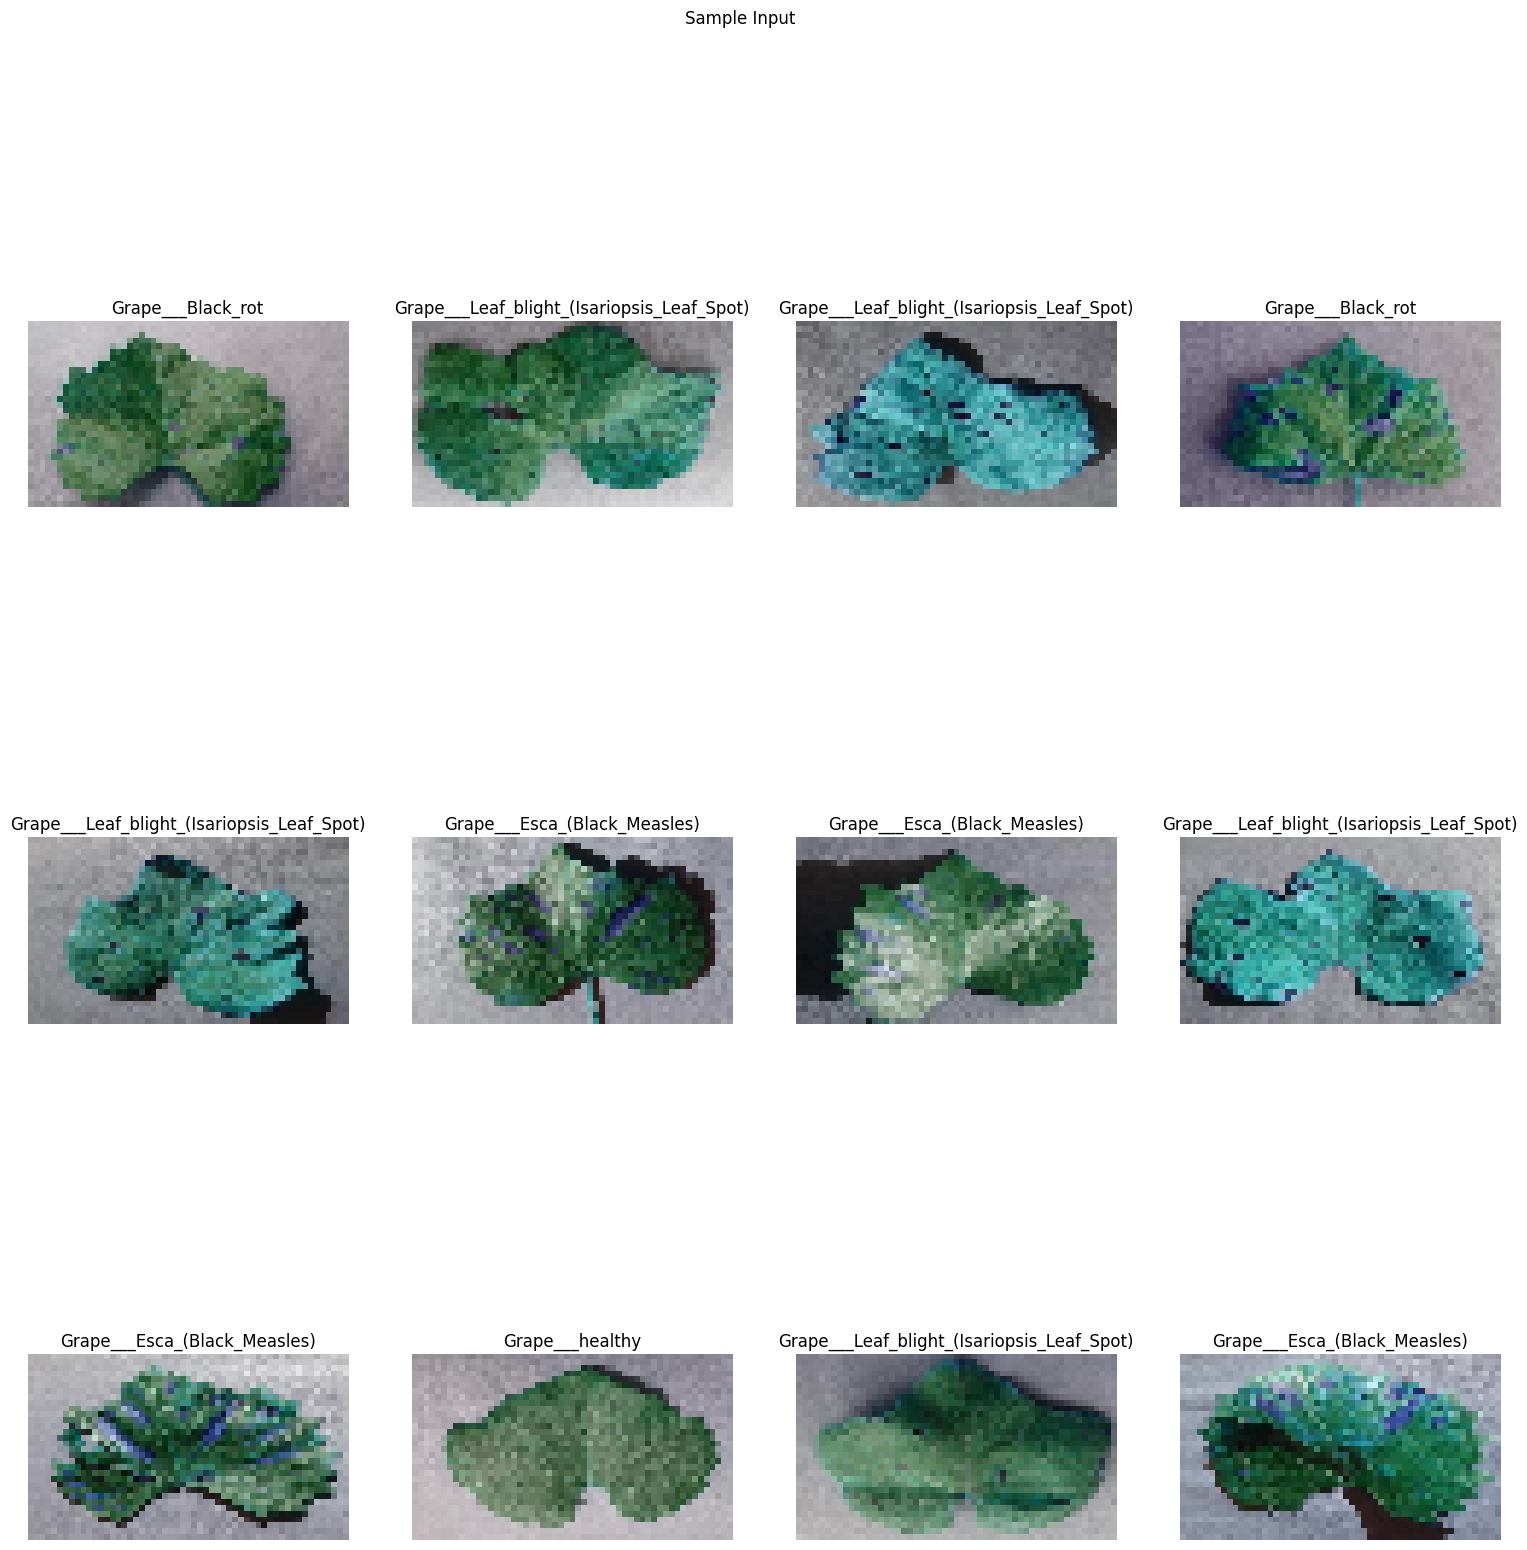

In [10]:
# Fazendo uma checagem para verificar se tudo esta ok
fig, axs = plt.subplots(3,4, figsize=(19, 19))
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')

for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [11]:
# particionando os dados em treinamento e teste usando 80% dos dados para treinamento e os 20% restantes para teste
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [12]:
# Pré-processando os rótulos de classes
trainY = np_utils.to_categorical(trainY, 4)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(4131, 32, 55, 3)
(1033, 32, 55, 3)
(4131, 4)
(1033,)


In [14]:
#Inicio da definicao da arquitetura do modelo
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 13, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2912)              0

2022-12-07 21:20:29.796912: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/trabalhof/mlpytorch/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-07 21:20:29.797810: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-07 21:20:29.797929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LEOSER4): /proc/driver/nvidia/version does not exist
2022-12-07 21:20:29.799495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate co

In [15]:
#Ajustando o modelo aos dados de treinamento, perdas e acuracia 
model.fit(trainX, trainY, batch_size=64, epochs=25, verbose=2)

Epoch 1/25
65/65 - 3s - loss: 0.9340 - accuracy: 0.5698 - 3s/epoch - 43ms/step
Epoch 2/25
65/65 - 2s - loss: 0.5564 - accuracy: 0.7732 - 2s/epoch - 26ms/step
Epoch 3/25
65/65 - 2s - loss: 0.4187 - accuracy: 0.8412 - 2s/epoch - 26ms/step
Epoch 4/25
65/65 - 2s - loss: 0.3288 - accuracy: 0.8792 - 2s/epoch - 26ms/step
Epoch 5/25
65/65 - 2s - loss: 0.3037 - accuracy: 0.8816 - 2s/epoch - 27ms/step
Epoch 6/25
65/65 - 2s - loss: 0.2546 - accuracy: 0.9104 - 2s/epoch - 27ms/step
Epoch 7/25
65/65 - 2s - loss: 0.2188 - accuracy: 0.9172 - 2s/epoch - 27ms/step
Epoch 8/25
65/65 - 2s - loss: 0.2016 - accuracy: 0.9298 - 2s/epoch - 28ms/step
Epoch 9/25
65/65 - 2s - loss: 0.2005 - accuracy: 0.9276 - 2s/epoch - 26ms/step
Epoch 10/25
65/65 - 2s - loss: 0.1696 - accuracy: 0.9380 - 2s/epoch - 27ms/step
Epoch 11/25
65/65 - 2s - loss: 0.1690 - accuracy: 0.9388 - 2s/epoch - 26ms/step
Epoch 12/25
65/65 - 2s - loss: 0.1567 - accuracy: 0.9455 - 2s/epoch - 26ms/step
Epoch 13/25
65/65 - 2s - loss: 0.1454 - accuracy:

33/33 [==============================] - 0s 5ms/step


/tmp/ipykernel_5988/1073903041.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
/tmp/ipykernel_5988/1073903041.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


<Figure size 640x480 with 0 Axes>

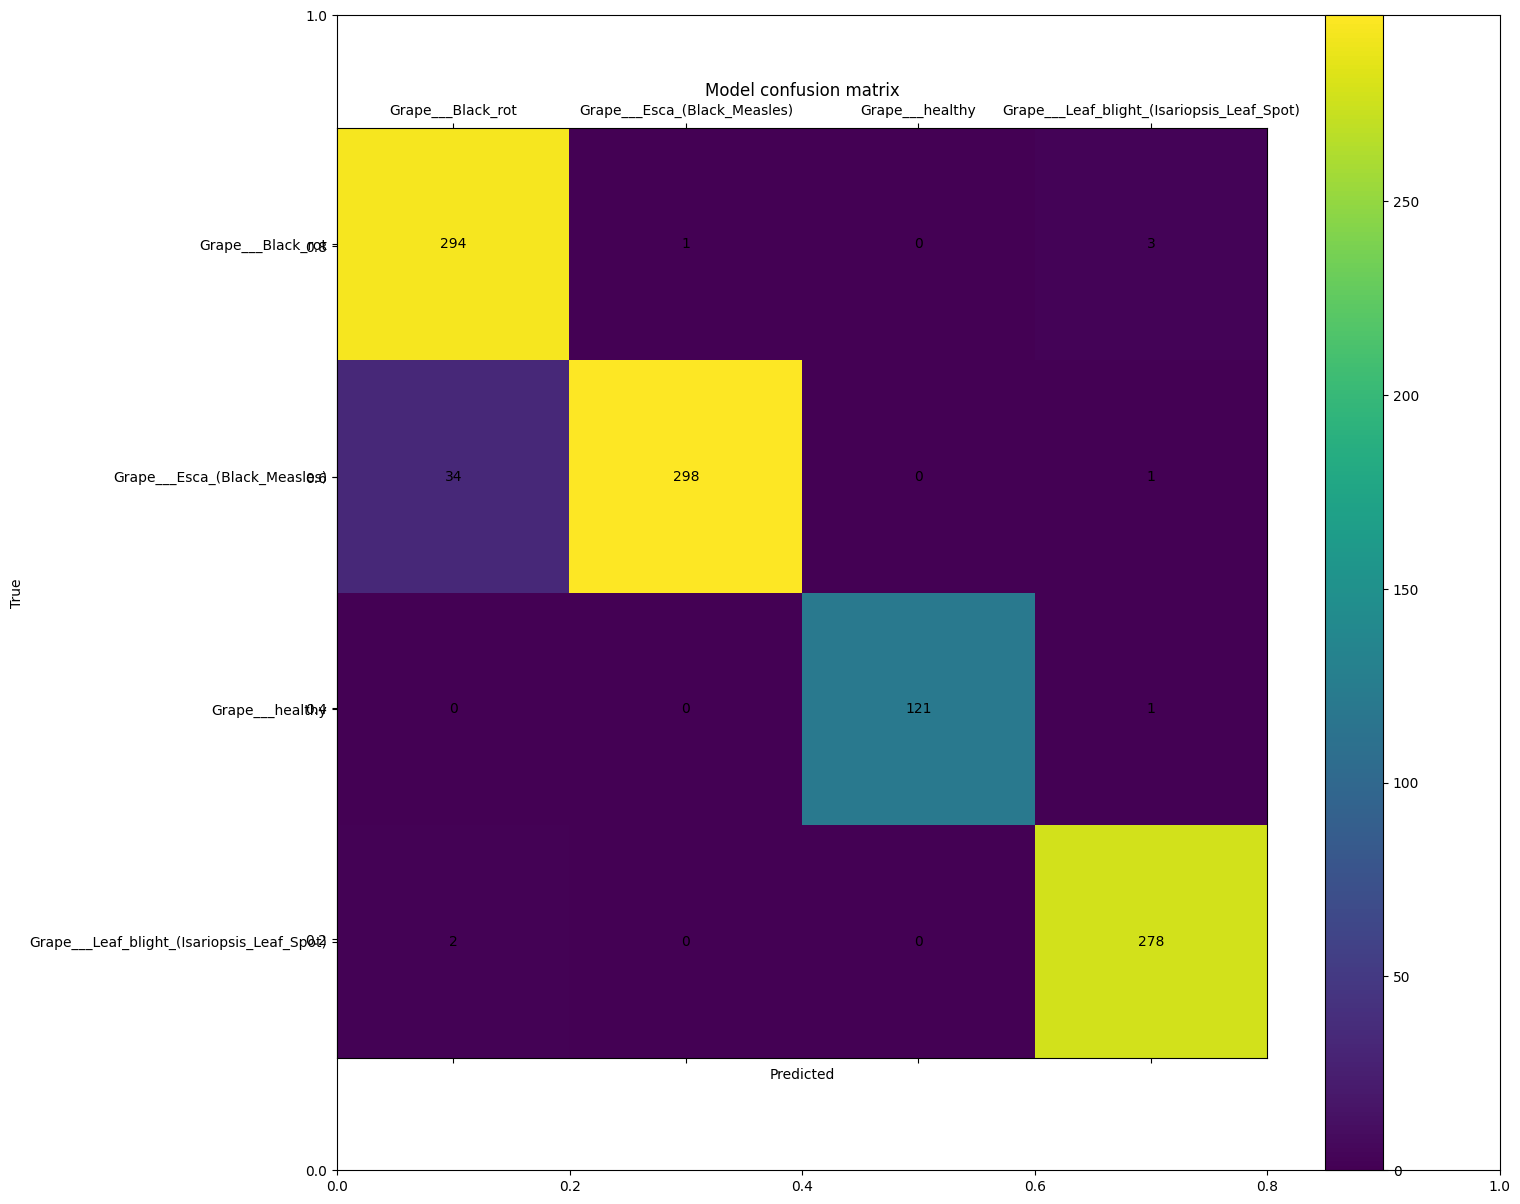

Accuracy : 95.93%


In [17]:
# Avalie o modelo em dados de teste visualizacao em matriz de confusao - acuracia
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(4):
    for j in range(4):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

1/1 [==============================] - 0s 20ms/step
Prediction : Grape___Black_rot


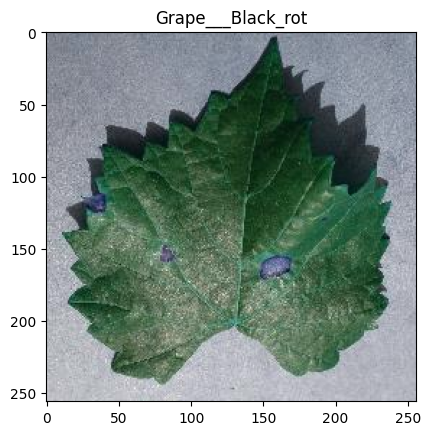

In [18]:
# Teste de uma imagem espeficica e predicao do modelo


test_data=[]
test_image_o = cv2.imread('/home/trabalhof/Grape/Grape___Black_rot/21.jpg')
test_image = cv2.resize(test_image_o, (WIDTH, HEIGHT))  # .flatten()
test_data.append(test_image)

# dimensionando as intensidades de pixel bruto para o intervalo [0, 1]
test_data = np.array(test_image, dtype="float") / 255.0
test_data=test_data.reshape([-1,32, 55, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

#Imersao na plotagem 
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

In [19]:
#vendo qual versao do tensorflow esta sendo utilizada
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
#print("GPU Available:", tf.test.is_gpu_available())
print("GPU Available:", tf.config.list_physical_devices('GPU'))

tf.keras.backend.clear_session()  # For easy reset of notebook state.

TensorFlow Version: 2.11.0
GPU Available: []


In [20]:
# Salvando previsões para verificações futuras
predictions = model.predict(testX)

33/33 [==============================] - 0s 5ms/step


In [21]:
# Salvando o modelo em .h5
model.save('/home/trabalhof/grapes_disease.h5')

# Recriacao exatamente do mesmo modelo, puramente do arquivo
new_model = keras.models.load_model('/home/trabalhof/grapes_disease.h5')

In [22]:
import numpy as np

# Verificacao se o estado esta preservado
new_predictions = new_model.predict(testX)
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)

# Observe que o estado do otimizador também é preservado: podemos retomar o treinamento de onde paramos.

33/33 [==============================] - 0s 5ms/step


In [23]:
#para chamar o modelo
New_Model = tf.keras.models.load_model('/home/trabalhof/grapes_disease.h5')

In [24]:
New_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 54, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 26, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 13, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 13, 32)         0         
                                                                 
 flatten (Flatten)           (None, 2912)              0